In [1]:
#import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
df = pd.read_csv(r"C:\Users\Soumyajit\Downloads\house-prices-advanced-regression-techniques\train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [6]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
df.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     False       False     False        False    False   False   True   
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
5     False       False     False        False    False   False   True   
6     False       False     False        False    False   False   True   
7     False       False     False         True    False   False   True   
8     False       False     False        False    False   False   True   
9     False       False     False        False    False   False   True   
10    False       False     False        False    False   False   True   
11    False       False     False        False    False   False   True   
12    False       False     False         True    False   False   True   
13    False       False     False        False    False   False   True   
14    False       False     False         True    False   False   True   
15    False       False     False        False    False   False   True   
16    False       False     False         True    False   False   True   
17    False       False     False        False    False   False   True   
18    False       False     False        False    False   False   True   
19    False       False     False        False    False   False   True   
20    False       False     False        False    False   False   True   
21    False       False     False        False    False   False  False   
22    False       False     False        False    False   False   True   
23    False       False     False        False    False   False   True   
24    False       False     False         True    False   False   True   
25    False       False     False        False    False   False   True   
26    False       False     False        False    False   False   True   
27    False       False     False        False    False   False   True   
28    False       False     False        False    False   False   True   
29    False       False     False        False    False   False   True   
30    False       False     False        False    False   False  False   
31    False       False     False         True    False   False   True   
32    False       False     False        False    False   False   True   
33    False       False     False        False    False   False   True   
34    False       False     False        False    False   False   True   
35    False       False     False        False    False   False   True   
36    False       False     False        False    False   False   True   
37    False       False     False        False    False   False   True   
38    False       False     False        False    False   False   True   
39    False       False     False        False    False   False   True   
40    False       False     False        False    False   False   True   
41    False       False     False        False    False   False   True   
42    False       False     False         True    False   False   True   
43    False       False     False         True    False   False   True   
44    False       False     False        False    False   False   True   
45    False       False     False        False    False   False   True   
46    False       False     False        False    False   False   True   
47    False       False     False        False    False   False   True   
48    False       False     False        False    False   False   True   
49    False       False     False        False    False   False   True   
50    False       False     False         True    False   False   True   
51    False       False     False        False    False   False   True   
52    False       False     False        False    False   False   True   
53    False  

In [16]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [19]:
missing_value_per = df.isnull().sum()/df.shape[0] * 100
missing_value_per

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [20]:
clm_drop = missing_value_per[missing_value_per >20]

In [23]:
clm_drop.keys()

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [24]:
missing_value_clm_gre_20 = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
df2_drop_clm = df.drop(columns = missing_value_clm_gre_20)

In [26]:
df2_drop_clm.shape

(1460, 75)

In [28]:
df3_num = df2_drop_clm.select_dtypes(include = ['int64', 'float64'])
df3_num.shape

(1460, 38)

In [29]:
df3_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

<AxesSubplot: >

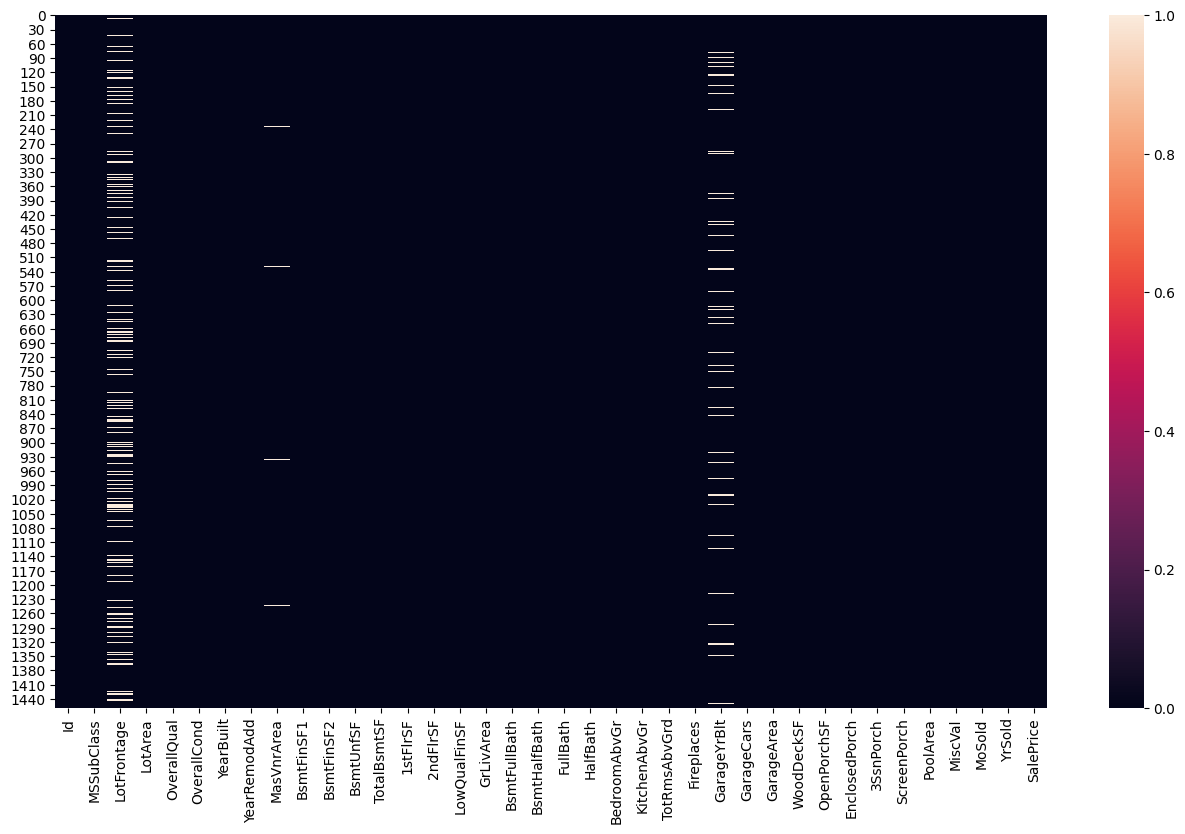

In [30]:
plt.figure(figsize = (16,9))
sns.heatmap(df3_num.isnull())

In [31]:
missing_num_var = [var for var in df3_num.columns if df3_num[var].isnull().sum()>0]
missing_num_var

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [32]:
num_var_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
df3_num[num_var_miss][df3_num[num_var_miss].isnull().any(axis = 1)]

LotFrontage  MasVnrArea  GarageYrBlt
7             NaN       240.0       1973.0
12            NaN         0.0       1962.0
14            NaN       212.0       1960.0
16            NaN       180.0       1970.0
24            NaN         0.0       1968.0
31            NaN         0.0       1966.0
39           65.0         0.0          NaN
42            NaN         0.0       1983.0
43            NaN         0.0       1977.0
48           33.0         0.0          NaN
50            NaN         0.0       1997.0
64            NaN       573.0       1998.0
66            NaN       287.0       1970.0
76            NaN         0.0       1956.0
78           72.0         0.0          NaN
84            NaN        22.0       1995.0
88          105.0         0.0          NaN
89           60.0         0.0          NaN
95            NaN        68.0       1993.0
99           77.0         0.0          NaN
100           NaN        28.0       1977.0
104           NaN       600.0       1951.0
108          85.0         0.0          NaN
111           NaN         0.0       2000.0
113           NaN       184.0       1953.0
116           NaN       116.0       1962.0
120           NaN         0.0       1969.0
125          60.0         0.0          NaN
126           NaN         0.0       1977.0
127          55.0         0.0          NaN
131           NaN        40.0       2000.0
133           NaN       136.0       2001.0
136           NaN       196.0       1967.0
140          70.0         0.0          NaN
147           NaN       180.0       2001.0
148          63.0       120.0          NaN
149           NaN         0.0       1936.0
152           NaN       252.0       1971.0
153           NaN         0.0       1960.0
155          60.0         0.0          NaN
160           NaN         0.0       1984.0
163          55.0         0.0          NaN
165          62.0         0.0          NaN
166           NaN         0.0       1955.0
169           NaN       653.0       1981.0
170           NaN         0.0       1991.0
177           NaN         0.0       1958.0
180           NaN       456.0       2000.0
186           NaN         0.0       1990.0
191           NaN       138.0       1972.0
198          92.0         0.0          NaN
203           NaN       205.0       2004.0
207           NaN         0.0       1960.0
208           NaN       128.0       1988.0
210          67.0         0.0          NaN
214           NaN       153.0       1977.0
218           NaN       312.0       1939.0
221           NaN         0.0       2002.0
234           NaN         NaN       2002.0
237           NaN         0.0       1993.0
241          40.0         0.0          NaN
244           NaN         0.0       1994.0
249           NaN       472.0       1958.0
250          55.0         0.0          NaN
269           NaN       174.0       1987.0
287           NaN         0.0          NaN
288           NaN        31.0       1970.0
291          55.0         0.0          NaN
293           NaN        34.0       1977.0
307           NaN         0.0          NaN
308           NaN         0.0       1961.0
310           NaN       112.0       1993.0
319           NaN       225.0       1980.0
328           NaN         0.0       1930.0
330           NaN        84.0       2002.0
335           NaN         0.0       1965.0
342           NaN       340.0       1949.0
346           NaN         0.0       1960.0
347           NaN        30.0       1960.0
351           NaN         0.0       1986.0
356           NaN       106.0       1992.0
360           NaN         0.0       1978.0
361           NaN         0.0       1940.0
364           NaN       120.0       1976.0
366           NaN       247.0       1963.0
369           NaN         0.0       1997.0
370           NaN         0.0       2000.0
375           NaN         0.0          NaN
384           NaN         0.0       1992.0
386          58.0         0.0          NaN
392           NaN         0.0       1959.0
393           NaN         0.0          NaN
404    

In [33]:
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [36]:
df[df.loc[:,'LotConfig'] == "Inside"]["LotFrontage"].replace(np.nan,df[df.loc[:,'LotConfig'] == "Inside"]["LotFrontage"].mean())

0        65.000000
2        68.000000
5        85.000000
6        75.000000
8        51.000000
10       70.000000
11       85.000000
12       67.715686
13       91.000000
17       72.000000
18       66.000000
19       70.000000
21       57.000000
22       75.000000
23       44.000000
24       67.715686
27       98.000000
29       60.000000
30       50.000000
33       70.000000
34       60.000000
35      108.000000
37       74.000000
38       68.000000
39       65.000000
40       84.000000
41      115.000000
44       70.000000
45       61.000000
47       84.000000
48       33.000000
49       66.000000
51       52.000000
53       68.000000
54       60.000000
55      100.000000
56       24.000000
59       60.000000
60       63.000000
61       60.000000
62       44.000000
63       50.000000
64       67.715686
65       76.000000
66       67.715686
67       72.000000
70       95.000000
73       85.000000
75       21.000000
76       67.715686
77       50.000000
78       72.000000
82       78.

In [42]:
df_copy = df.copy()
for var_class in df['LotConfig'].unique():
    df_copy.update(df[df.loc[:,'LotConfig'] == var_class]["LotFrontage"].replace(np.nan,df[df.loc[:,'LotConfig'] == var_class]["LotFrontage"].mean()))
    

In [43]:
df_copy.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
df_copy = df.copy()
num_var_miss = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
cat_vars = ['LotFrontage', 'MasVnrType','GarageType']

for var_class in df['LotConfig'].unique():
    df_copy.update(df[df.loc[:,'LotConfig'] == var_class]["LotFrontage"].replace(np.nan,df[df.loc[:,'LotConfig'] == var_class]["LotFrontage"].mean()))
     